# Camera test

In [1]:
import cv2 as cv

# To reduce output size while working with vscode
%config InlineBackend.figure_format = 'png'

%matplotlib inline

In [8]:
from io import BytesIO
import IPython.display
import PIL.Image

def camera_capture():
    camera = cv.VideoCapture(0)
    camera.set(3, 640)
    camera.set(4, 480)
    ret, image = camera.read()

    if not ret:
        return None

    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    camera.release()
    return image

def camera_stream():
    camera = cv.VideoCapture(0)
    camera.set(3, 640)
    camera.set(4, 480)
    try: 
        while True:
            ret, frame = camera.read()
            frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
            
            stream = BytesIO()
            PIL.Image.fromarray(frame).save(stream, format="jpeg")
            IPython.display.display(IPython.display.Image(data=stream.getvalue()))

            IPython.display.clear_output(wait=True)
    except KeyboardInterrupt:
        camera.release()
        print("Stream Stopped")

## Single image capturing

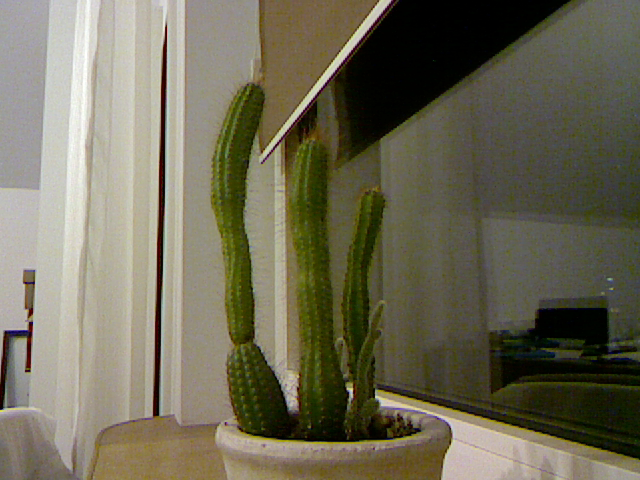

In [24]:
image = camera_capture()
PIL.Image.fromarray(image)

## Video streaming

In [9]:
camera_stream()

Stream Stopped
